## WeatherPy

**Analysis - Observable Trends**

1. The curve of the Latitude vs. Max Temperature plot shows how the temperature increases the closer you get to the equator (0 degrees latitude) and the cooler it gets the further you go north or south.
2. The Northern Hemisphere City Latitude vs. Max Temperature regression plot shows a strong negative correlation between the latitude value and the maximum temperature. This illustrates how the further you go north from the equator, the colder the temperatures get.
3. The small r-value for the Southern Hemisphere City Latitude vs. Cloudiness plot indicates that there is a slight positive correlation between the latitude and cloudiness. However, this value is not strong enough to clearly say that the further north you go towards the equator in the southern hemisphere, the cloudier it gets.

In [1]:
#import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

#import API key
from api_keys import weather_api_key

#import citipy to determine city based on latitude and longitude
from citipy import citipy

#set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
#create lists for holding lat_lngs and cities
lat_lngs = []
cities = []

#create set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls

In [3]:
#set starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#create lists for holding city data
new_cities = []
countries = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
dates = []
lats = []
lngs = []

#print beginning of retrieval
print("---------------------------------------")
print("Beginning Data Retrieval")
print("---------------------------------------")

#create counters
counter = 0
group = 1

#loop through all the cities in our list
for city in cities:

    #try an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        response = requests.get(url + "&q=" + city).json()
                
        #parse out each piece of data we're looking for and append to lists
        max_temps.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        cloudinesses.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        wind_speeds.append(response["wind"]["speed"])
        dates.append(response["dt"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        
        #create groups of 50, append cities to list, update counter value
        if counter > 49:
            counter = 1
            group += 1
            new_cities.append(city)
        else:
            counter += 1
            new_cities.append(city)
        
        #print as records are processing
        print(f"Processing Record {counter} of Set {group} | {city}")
    
    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping to next...")

#indicate that data loading is complete 
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

---------------------------------------
Beginning Data Retrieval
---------------------------------------
Processing Record 1 of Set 1 | ushuaia
City not found. Skipping to next...
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | sur
Processing Record 4 of Set 1 | albany
City not found. Skipping to next...
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | hearst
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | moron
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | te anau
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | iringa
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | sept-iles
Processing Record 21 of 

Processing Record 34 of Set 4 | tara
City not found. Skipping to next...
Processing Record 35 of Set 4 | lensk
Processing Record 36 of Set 4 | fomboni
Processing Record 37 of Set 4 | pyu
Processing Record 38 of Set 4 | chumikan
Processing Record 39 of Set 4 | bukama
Processing Record 40 of Set 4 | algete
Processing Record 41 of Set 4 | ondangwa
Processing Record 42 of Set 4 | potosi
Processing Record 43 of Set 4 | zhicheng
Processing Record 44 of Set 4 | bacolod
Processing Record 45 of Set 4 | katherine
Processing Record 46 of Set 4 | xifeng
Processing Record 47 of Set 4 | kalush
Processing Record 48 of Set 4 | boa vista
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | ust-maya
Processing Record 1 of Set 5 | san quintin
City not found. Skipping to next...
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | antalaha
Processing Record 4 of Set 5 | zhigansk
Processing Record 5 of Set 5 | nyamuswa
Processing Record 6 of Set 5 | boddam
City not foun

Processing Record 22 of Set 8 | kollam
Processing Record 23 of Set 8 | haverfordwest
Processing Record 24 of Set 8 | vila franca do campo
Processing Record 25 of Set 8 | rawson
Processing Record 26 of Set 8 | santa cruz de tenerife
Processing Record 27 of Set 8 | kupang
Processing Record 28 of Set 8 | ugoofaaru
Processing Record 29 of Set 8 | espanola
Processing Record 30 of Set 8 | amambai
Processing Record 31 of Set 8 | teknaf
Processing Record 32 of Set 8 | caluquembe
Processing Record 33 of Set 8 | moerai
Processing Record 34 of Set 8 | camocim
Processing Record 35 of Set 8 | gizo
Processing Record 36 of Set 8 | atar
Processing Record 37 of Set 8 | sao felix do xingu
Processing Record 38 of Set 8 | vondrozo
Processing Record 39 of Set 8 | turukhansk
Processing Record 40 of Set 8 | george town
Processing Record 41 of Set 8 | marsh harbour
Processing Record 42 of Set 8 | puerto leguizamo
Processing Record 43 of Set 8 | saldanha
City not found. Skipping to next...
Processing Record 44

Processing Record 3 of Set 12 | macapa
Processing Record 4 of Set 12 | gap
---------------------------------------
Data Retrieval Complete
---------------------------------------


### Convert Raw Data to DataFrame

In [4]:
#convert array of JSONs into DataFrame
df_columns = {"City" : new_cities, "Country" : countries, "Latitude" : lats, "Longitude" : lngs, 
              "Max Temperature" : max_temps, "Humidity": humidities, "Cloudiness" : cloudinesses, 
              "Wind Speed" : wind_speeds, "Date" : dates}

In [5]:
#show record count and display the City DataFrame
city_df = pd.DataFrame.from_dict(df_columns)
print(city_df["City"].count())
city_df.head()

554


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,ushuaia,AR,-54.80,-68.30,50.00,61,20,2.13,1603671119
1,puerto ayora,EC,-0.74,-90.35,68.00,86,53,5.99,1603671267
2,sur,OM,22.57,59.53,72.66,61,0,6.33,1603671267
3,albany,US,42.60,-73.97,43.00,54,1,3.53,1603671267
4,lorengau,PG,-2.02,147.27,86.11,65,100,5.70,1603671268


In [6]:
#export to csv
city_df.to_csv(path_or_buf = "output_files/city_data.csv")

### Inspect the data and remove the cities where the humidity > 100%.
- Skip this step if there are no cities that have humidity > 100%.

In [7]:
#check if max humidity is over 100
city_df.max()

City                  zuwarah
Country                    ZM
Latitude                78.22
Longitude              178.42
Max Temperature          93.2
Humidity                  100
Cloudiness                100
Wind Speed              31.27
Date               1603671471
dtype: object

### Latitude vs. Temperature Plot

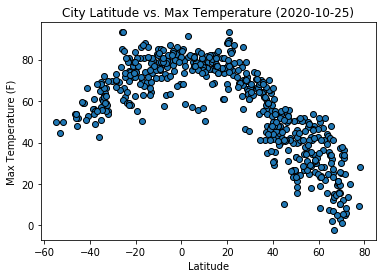

In [8]:
#build scatter plot for latitude vs. temperature
lat_temp = plt.scatter(city_df["Latitude"], city_df["Max Temperature"], edgecolors = "black")

#get today's date
today = date.today() 

#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save the figure as png
plt.savefig("output_files/lat_temp.png")

#show plot
plt.show()

### Latitude vs. Humidity Plot

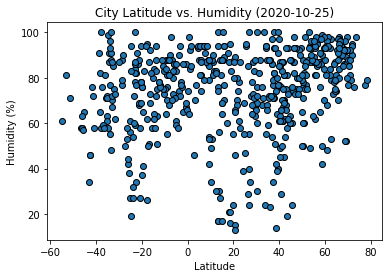

In [9]:
#build scatter plot for latitude vs. humidity
lat_humid = plt.scatter(city_df["Latitude"], city_df["Humidity"], edgecolors = "black")

#incorporate other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save the figure as png
plt.savefig("output_files/lat_humid.png")

#show plot
plt.show()

### Latitude vs. Cloudiness Plot

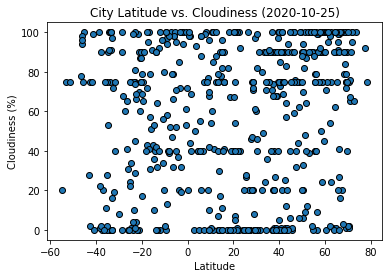

In [10]:
#build scatter plot for latitude vs. cloudiness
lat_cloud = plt.scatter(city_df["Latitude"], city_df["Cloudiness"], edgecolors = "black")

#incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the figure as png
plt.savefig("output_files/lat_cloudy.png")

#show plot
plt.show()

### Latitude vs. Wind Speed Plot

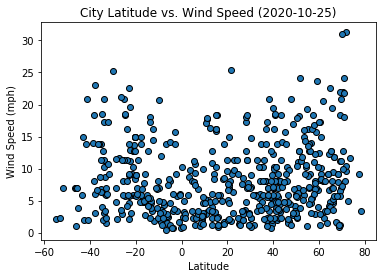

In [11]:
#build scatter plot for latitude vs. wind speed
lat_wind = plt.scatter(city_df["Latitude"], city_df["Wind Speed"], edgecolors = "black")

#incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save the figure as png
plt.savefig("output_files/lat_wind.png")

#show plot
plt.show()

### Linear Regression

In [115]:
#create a function to create Linear Regression plots
def linreg(x_values, y_values):  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(.55,.9),xycoords = 'axes fraction', fontsize=15,color="red")

In [116]:
#create Northern and Southern Hemisphere DataFrames
n_hem = city_df.loc[(city_df["Latitude"] > 0)]
s_hem = city_df.loc[(city_df["Latitude"] < 0)]

### Max Temp vs. Latitude Linear Regression

The r-value is: -0.8770882334158467


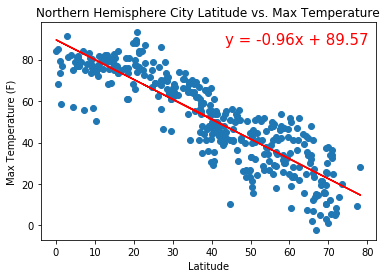

In [117]:
#linear regression on Northern Hemisphere
linreg(n_hem["Latitude"], n_hem["Max Temperature"])
plt.title("Northern Hemisphere City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save the figure as png
plt.savefig("output_files/lat_temp_regn.png")

#show plot
plt.show()

The r-value is: 0.7017616992640567


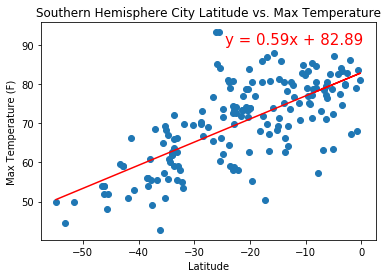

In [118]:
#linear regression on Southern Hemisphere
linreg(s_hem["Latitude"], s_hem["Max Temperature"])
plt.title("Southern Hemisphere City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save the figure as png
plt.savefig("output_files/lat_temp_regs.png")

#show plot
plt.show()

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24397108244234897


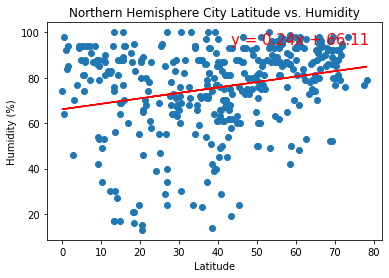

In [119]:
#Northern Hemisphere
linreg(n_hem["Latitude"], n_hem["Humidity"])
plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save the figure as png
plt.savefig("output_files/lat_humid_regn.png")

#show plot
plt.show()

The r-value is: 0.18143565120928726


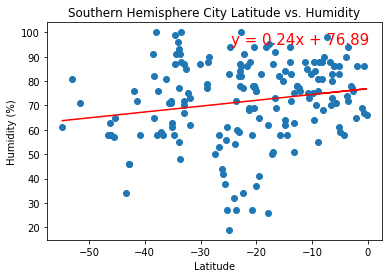

In [120]:
#Southern Hemisphere
linreg(s_hem["Latitude"], s_hem["Humidity"])
plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save the figure as png
plt.savefig("output_files/lat_humid_regs.png")

#show plot
plt.show()
plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20524250564959512


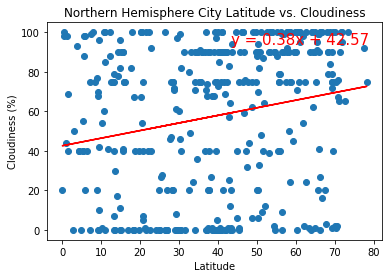

In [121]:
#Northern Hemisphere
linreg(n_hem["Latitude"], n_hem["Cloudiness"])
plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the figure as png
plt.savefig("output_files/lat_cloudy_regn.png")

#show plot
plt.show()

The r-value is: 0.12064865241198329


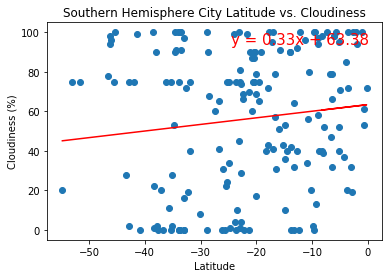

In [122]:
#Southern Hemisphere
linreg(s_hem["Latitude"], s_hem["Cloudiness"])
plt.title("Southern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the figure as png
plt.savefig("output_files/lat_cloudy_regs.png")

#show plot
plt.show()

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.24843285565158818


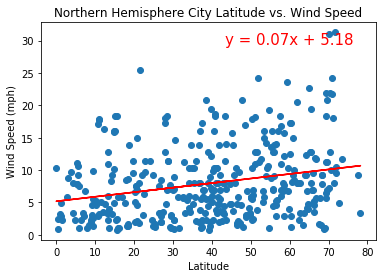

In [123]:
#Northern Hemisphere
linreg(n_hem["Latitude"], n_hem["Wind Speed"])
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save the figure as png
plt.savefig("output_files/lat_wind_regn.png")

#show plot
plt.show()

The r-value is: -0.19662941745368887


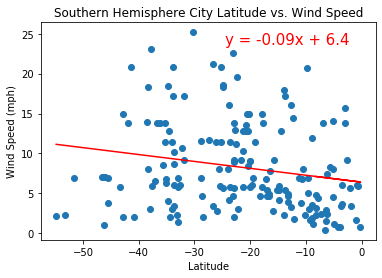

In [124]:
#Southern Hemisphere
linreg(s_hem["Latitude"], s_hem["Wind Speed"])
plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save the figure as png
plt.savefig("output_files/lat_wind_regs.png")

#show plot
plt.show()